In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import os

In [5]:
os.getcwd()

'/home/jupyter/sqlalchemy-challenge'

## Step 1 - Climate Analysis and Exploration

In [6]:
database_path = "Resources/hawaii.sqlite"

In [7]:
engine = create_engine(f"sqlite:///{database_path}")

In [8]:
CONN = engine.connect()

### Precipitation Analysis

In [9]:
# reflect an existing database into a new model

df_measurement = pd.read_sql("SELECT * FROM measurement", CONN)

# reflect the tables
df_measurement

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [10]:
df_measurement.dtypes

id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [11]:
df_measurement["date"] = pd.to_datetime(df_measurement["date"])
df_measurement.dtypes

id                  int64
station            object
date       datetime64[ns]
prcp              float64
tobs              float64
dtype: object

#### Design a query to retrieve the last 12 months of precipitation data.

In [12]:
cmd = "SELECT min(date) as min_date, max(date) as max_date FROM measurement"

In [13]:
pd.read_sql(cmd, con=engine)


,min_date,max_date
0,2010-01-01,2017-08-23


In [14]:
cmd = "SELECT * FROM measurement WHERE date >= '2016-08-23'"

In [15]:
pd.read_sql(cmd, con=engine)

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0
2226,19547,USC00516128,2017-08-20,NaN,78.0
2227,19548,USC00516128,2017-08-21,0.56,76.0
2228,19549,USC00516128,2017-08-22,0.50,76.0


#### Select only the `date` and `prcp` values.


In [16]:
cmd = "SELECT date, prcp FROM measurement WHERE date >= '2016-08-23' GROUP BY date"

In [17]:
pd.read_sql(cmd, con=engine)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
361,2017-08-19,0.00
362,2017-08-20,0.00
363,2017-08-21,0.00
364,2017-08-22,0.00


#### Load the query results into a Pandas DataFrame and set the index to the date column.

In [18]:
df_12months = pd.read_sql(cmd, con=engine)

In [19]:
df_12months.dropna()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
361,2017-08-19,0.00
362,2017-08-20,0.00
363,2017-08-21,0.00
364,2017-08-22,0.00


#### Sort the DataFrame values by `date`.

In [20]:
df_months = df_12months.sort_values("date", ascending=False)[
    ["date", "prcp"]
]
df_months.dropna()

,date,prcp
365,2017-08-23,0.00
364,2017-08-22,0.00
363,2017-08-21,0.00
362,2017-08-20,0.00
361,2017-08-19,0.00
...,...,...
4,2016-08-27,0.00
3,2016-08-26,0.00
2,2016-08-25,0.08
1,2016-08-24,0.08


           date  prcp
365  2017-08-23  0.00
355  2017-08-13  0.00
345  2017-08-03  0.00
335  2017-07-24  0.05
325  2017-07-14  0.02
315  2017-07-04  0.04
305  2017-06-24  0.06
295  2017-06-14  0.00
285  2017-06-04  0.00
275  2017-05-25  0.15
265  2017-05-15  0.05
255  2017-05-05  0.00
245  2017-04-25  0.00
235  2017-04-15  0.01
225  2017-04-05  0.00
215  2017-03-26  0.00
205  2017-03-16  0.00
195  2017-03-06  0.00
185  2017-02-24  0.00
175  2017-02-14  0.00
165  2017-02-04  0.00
155  2017-01-25  0.03
145  2017-01-15  0.00
135  2017-01-05  0.00
125  2016-12-26  0.02
115  2016-12-16  0.00
105  2016-12-06  0.02
95   2016-11-26  0.05
85   2016-11-16  0.00
75   2016-11-06  0.00
65   2016-10-27  0.00
55   2016-10-17  0.01
45   2016-10-07  0.00
35   2016-09-27  0.02
25   2016-09-17  0.05
15   2016-09-07  0.05
5    2016-08-28  0.01


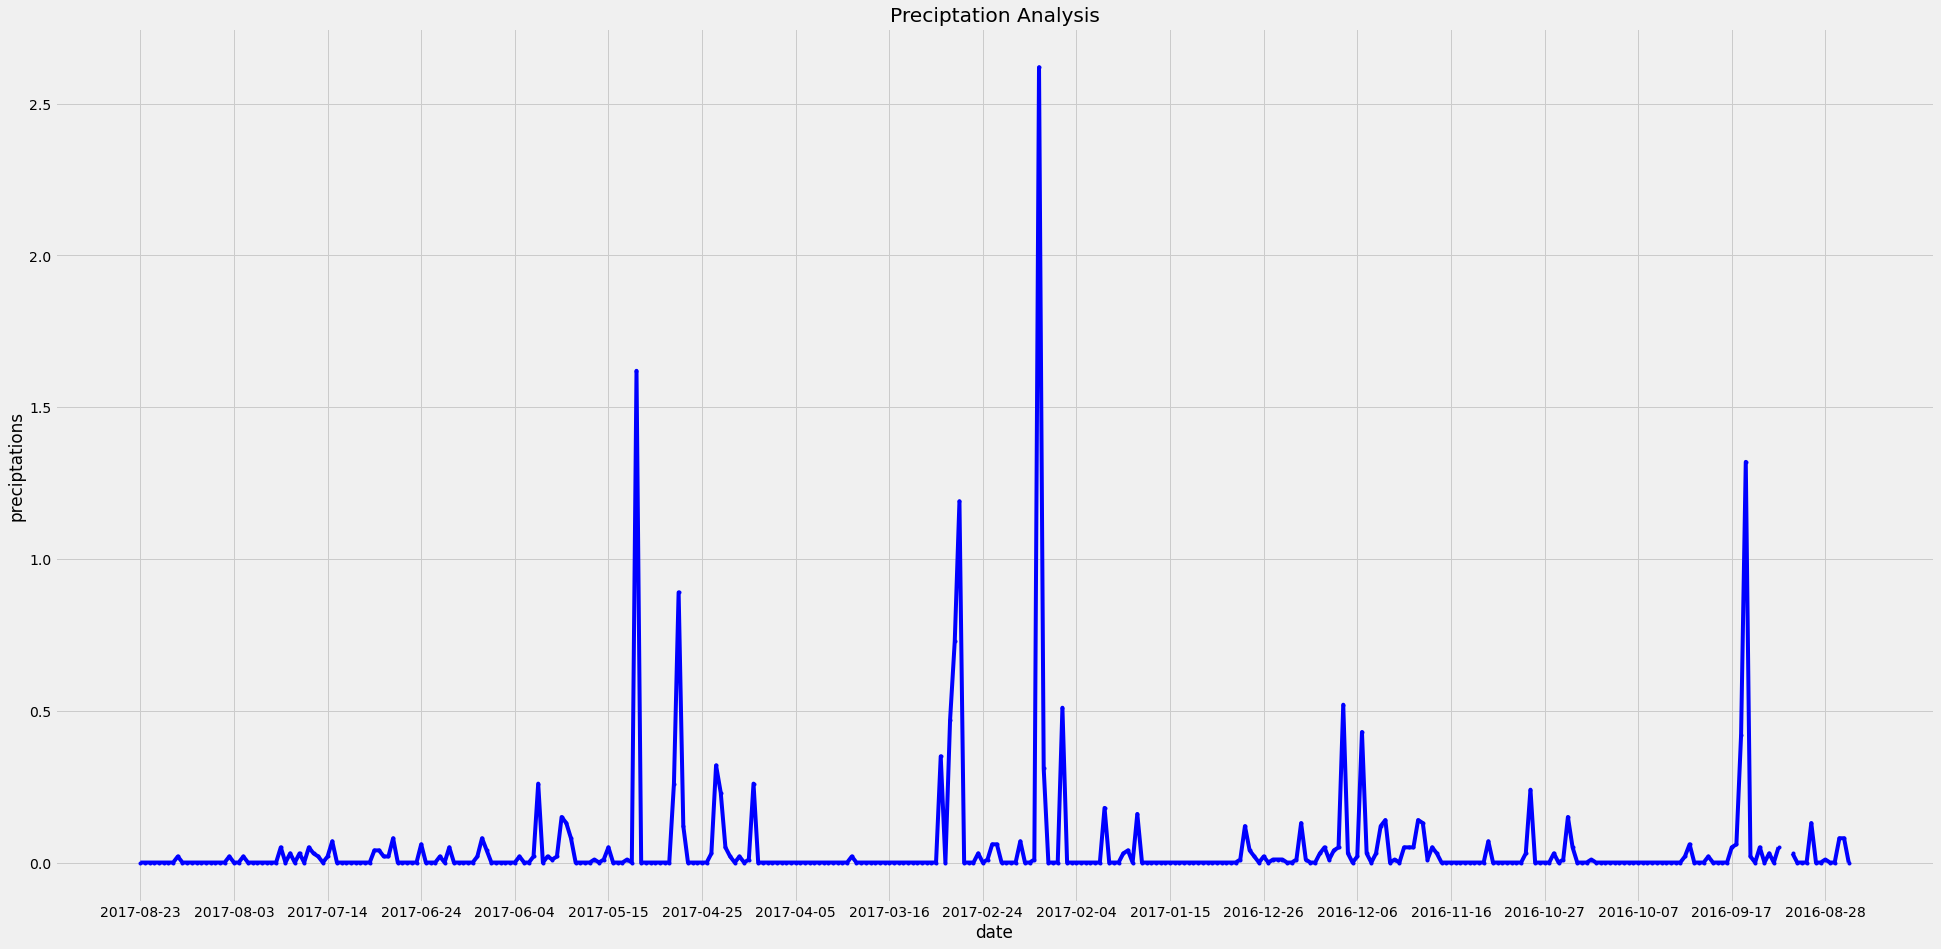

In [21]:
plt.figure(figsize=(30,15))
plt.title('Preciptation Analysis')
plt.plot(df_months.date, df_months.prcp, 'b.-')
plt.xticks(df_months.date[::20])
print(df_months[::10])
plt.xlabel('date')
plt.ylabel('preciptations')


plt.show()
    

### Station Analysis.

#### Design a query to calculate the total number of stations.

In [22]:
df_station = pd.read_sql("SELECT * FROM station", CONN)
df_station


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [23]:
df_station["station"].count()

9

In [24]:
df_station.dtypes

id             int64
station       object
name          object
latitude     float64
longitude    float64
elevation    float64
dtype: object

#### Design a query to find the most active stations.

##### List the stations and observation counts in descending order.

In [25]:
df_measurement_tobs = df_measurement.sort_values("tobs", ascending=False)[
    ["station", "tobs"]
]
df_measurement_tobs

,station,tobs
212,USC00519397,87.0
15209,USC00511918,87.0
2635,USC00519397,87.0
8990,USC00517948,87.0
16288,USC00511918,86.0
...,...,...
1763,USC00519397,56.0
14079,USC00519281,56.0
16123,USC00511918,55.0
13293,USC00519281,54.0


##### Which station has the highest number of observations?

In [26]:
df_measurement_tobs_count = df_measurement_tobs.groupby(["station"])
df_count = df_measurement_tobs_count.count()
df_count

,tobs
station,
USC00511918,1979
USC00513117,2709
USC00514830,2202
USC00516128,2612
USC00517948,1372
USC00518838,511
USC00519281,2772
USC00519397,2724
USC00519523,2669


##### Using the station id from the previous query, calculate the lowest temperature recorded, 
##### highest temperature recorded, and average temperature of the most active station?

In [27]:
Most_Active_Station = df_measurement_tobs.loc[
    df_measurement_tobs["station"] == "USC00519523", "tobs"
]
Most_Active_Station.describe()

count    2669.000000
mean       74.543649
std         4.323161
min        56.000000
25%        72.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: tobs, dtype: float64

#### Design a query to retrieve the last 12 months of temperature observation data (TOBS)

In [28]:
cmd = "SELECT station, date, tobs FROM measurement WHERE date >= '2016-08-23' GROUP BY date"

In [29]:
df_analysis = pd.read_sql(cmd, con=engine)
df_analysis

,station,date,tobs
0,USC00519397,2016-08-23,81.0
1,USC00519397,2016-08-24,79.0
2,USC00519397,2016-08-25,80.0
3,USC00519397,2016-08-26,79.0
4,USC00519397,2016-08-27,77.0
...,...,...,...
361,USC00519397,2017-08-19,79.0
362,USC00519397,2017-08-20,81.0
363,USC00519397,2017-08-21,81.0
364,USC00519397,2017-08-22,82.0


In [30]:
df_analysis.describe()

,tobs
count,366.000000
mean,75.234973
std,4.948444
min,60.000000
25%,72.000000
50%,77.000000
75%,79.000000
max,87.000000


##### Choose the station with the highest number of temperature observations.
##### Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [31]:
df_analysis_tobs = df_analysis.groupby(["station"])
df_analysis_tobs.count()


,date,tobs
station,,
USC00513117,3,3
USC00514830,2,2
USC00519397,361,361


In [32]:
Most_Active_Station_12Months = df_analysis.loc[
    df_analysis["station"] == "USC00519397", "tobs"
]
Most_Active_Station_12Months

0      81.0
1      79.0
2      80.0
3      79.0
4      77.0
       ... 
361    79.0
362    81.0
363    81.0
364    82.0
365    81.0
Name: tobs, Length: 361, dtype: float64

(array([  7.,   9.,  12.,  14.,  40.,  30.,  37.,  62., 125.,  23.,   1.,
          1.]),
 array([60.  , 62.25, 64.5 , 66.75, 69.  , 71.25, 73.5 , 75.75, 78.  ,
        80.25, 82.5 , 84.75, 87.  ]),
 <BarContainer object of 12 artists>)

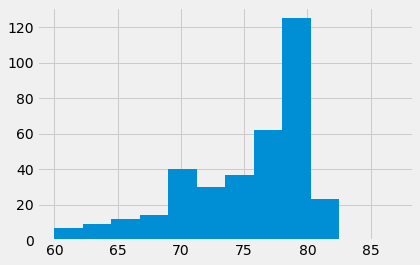

In [33]:
plt.hist(Most_Active_Station_12Months, bins = 12)

(array([  7.,   9.,  12.,  14.,  40.,  31.,  38.,  62., 127.,  24.,   1.,
          1.]),
 array([60.  , 62.25, 64.5 , 66.75, 69.  , 71.25, 73.5 , 75.75, 78.  ,
        80.25, 82.5 , 84.75, 87.  ]),
 <BarContainer object of 12 artists>)

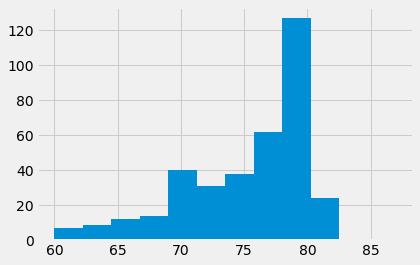

In [34]:
plt.hist(df_analysis["tobs"], bins = 12)

In [35]:
df_join = pd.merge(df_measurement, df_station, how="left", on="station")
df_join

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [36]:
df_months = df_12months.sort_values("date", ascending=False)[
    ["date", "prcp"]
]
df_months

,date,prcp
365,2017-08-23,0.00
364,2017-08-22,0.00
363,2017-08-21,0.00
362,2017-08-20,0.00
361,2017-08-19,0.00
...,...,...
4,2016-08-27,0.00
3,2016-08-26,0.00
2,2016-08-25,0.08
1,2016-08-24,0.08


In [37]:
from flask import Flask, jsonify, request

In [38]:
app = Flask(__name__)

In [39]:
precipitation = df_months.to_dict(orient='record')
precipitation

[{'date': '2017-08-23', 'prcp': 0.0},
 {'date': '2017-08-22', 'prcp': 0.0},
 {'date': '2017-08-21', 'prcp': 0.0},
 {'date': '2017-08-20', 'prcp': 0.0},
 {'date': '2017-08-19', 'prcp': 0.0},
 {'date': '2017-08-18', 'prcp': 0.0},
 {'date': '2017-08-17', 'prcp': 0.0},
 {'date': '2017-08-16', 'prcp': 0.0},
 {'date': '2017-08-15', 'prcp': 0.02},
 {'date': '2017-08-14', 'prcp': 0.0},
 {'date': '2017-08-13', 'prcp': 0.0},
 {'date': '2017-08-12', 'prcp': 0.0},
 {'date': '2017-08-11', 'prcp': 0.0},
 {'date': '2017-08-10', 'prcp': 0.0},
 {'date': '2017-08-09', 'prcp': 0.0},
 {'date': '2017-08-08', 'prcp': 0.0},
 {'date': '2017-08-07', 'prcp': 0.0},
 {'date': '2017-08-06', 'prcp': 0.0},
 {'date': '2017-08-05', 'prcp': 0.0},
 {'date': '2017-08-04', 'prcp': 0.02},
 {'date': '2017-08-03', 'prcp': 0.0},
 {'date': '2017-08-02', 'prcp': 0.0},
 {'date': '2017-08-01', 'prcp': 0.02},
 {'date': '2017-07-31', 'prcp': 0.0},
 {'date': '2017-07-30', 'prcp': 0.0},
 {'date': '2017-07-29', 'prcp': 0.0},
 {'date':

In [40]:
station = df_station.to_dict(orient='record')
station

[{'id': 1,
  'station': 'USC00519397',
  'name': 'WAIKIKI 717.2, HI US',
  'latitude': 21.2716,
  'longitude': -157.8168,
  'elevation': 3.0},
 {'id': 2,
  'station': 'USC00513117',
  'name': 'KANEOHE 838.1, HI US',
  'latitude': 21.4234,
  'longitude': -157.8015,
  'elevation': 14.6},
 {'id': 3,
  'station': 'USC00514830',
  'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'latitude': 21.5213,
  'longitude': -157.8374,
  'elevation': 7.0},
 {'id': 4,
  'station': 'USC00517948',
  'name': 'PEARL CITY, HI US',
  'latitude': 21.3934,
  'longitude': -157.9751,
  'elevation': 11.9},
 {'id': 5,
  'station': 'USC00518838',
  'name': 'UPPER WAHIAWA 874.3, HI US',
  'latitude': 21.4992,
  'longitude': -158.0111,
  'elevation': 306.6},
 {'id': 6,
  'station': 'USC00519523',
  'name': 'WAIMANALO EXPERIMENTAL FARM, HI US',
  'latitude': 21.33556,
  'longitude': -157.71139,
  'elevation': 19.5},
 {'id': 7,
  'station': 'USC00519281',
  'name': 'WAIHEE 837.5, HI US',
  'latitude': 21.45167,
  'l

In [41]:
hawaii = df_join.to_dict(orient='record')
hawaii

[{'id_x': 1,
  'station': 'USC00519397',
  'date': Timestamp('2010-01-01 00:00:00'),
  'prcp': 0.08,
  'tobs': 65.0,
  'id_y': 1,
  'name': 'WAIKIKI 717.2, HI US',
  'latitude': 21.2716,
  'longitude': -157.8168,
  'elevation': 3.0},
 {'id_x': 2,
  'station': 'USC00519397',
  'date': Timestamp('2010-01-02 00:00:00'),
  'prcp': 0.0,
  'tobs': 63.0,
  'id_y': 1,
  'name': 'WAIKIKI 717.2, HI US',
  'latitude': 21.2716,
  'longitude': -157.8168,
  'elevation': 3.0},
 {'id_x': 3,
  'station': 'USC00519397',
  'date': Timestamp('2010-01-03 00:00:00'),
  'prcp': 0.0,
  'tobs': 74.0,
  'id_y': 1,
  'name': 'WAIKIKI 717.2, HI US',
  'latitude': 21.2716,
  'longitude': -157.8168,
  'elevation': 3.0},
 {'id_x': 4,
  'station': 'USC00519397',
  'date': Timestamp('2010-01-04 00:00:00'),
  'prcp': 0.0,
  'tobs': 76.0,
  'id_y': 1,
  'name': 'WAIKIKI 717.2, HI US',
  'latitude': 21.2716,
  'longitude': -157.8168,
  'elevation': 3.0},
 {'id_x': 5,
  'station': 'USC00519397',
  'date': Timestamp('2010-

In [42]:
@app.route("/")
def home():
    return "The app is up!"

In [43]:
@app.route("/api/v1.0/precipitation")
def query_prcp():
    min_date = (request.args.get("min_date", '2016-08-23'))
    max_date = (request.args.get("max_date", '2017-08-23'))
    return jsonify([prcp for prcp in precipitation if min_date <= prcp["date"] <= max_date])

In [44]:
@app.route("/api/v1.0/<station_name>")
def show_by_name(station_name):
    return jsonify([name for name in hawaii if station["name"] == station_name])

In [46]:
# if __name__ == "__main__":
#     app.run()